# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.
* The majority of studied city were from the Northern hemisphere (Total cities: 1372, Northern Hemisphere cities: 890, Southern Hemisphere cities: 482).

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [27]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from datetime import datetime

# Import API key
from api_keys import (owmkey,gkey)

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=5000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=5000)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
cities

['punta arenas',
 'dikson',
 'kurikka',
 'rikitea',
 'hilo',
 'gouyave',
 'hermanus',
 'geraldton',
 'saldanha',
 'mount isa',
 'hobart',
 'kegayli',
 'chokurdakh',
 'utiroa',
 'port alfred',
 'saskylakh',
 'ushuaia',
 'buala',
 'grand gaube',
 'yerbogachen',
 'lavrentiya',
 'georgetown',
 'faanui',
 'saint-philippe',
 'kapaa',
 'souillac',
 'busselton',
 'nikolskoye',
 'vaini',
 'tokur',
 'dunedin',
 'atocha',
 'palabuhanratu',
 'bluff',
 'vao',
 'angoche',
 'molochnoye',
 'kuytun',
 'bethel',
 'dixon',
 'victoria',
 'nelson bay',
 'tsihombe',
 'atar',
 'manaure',
 'mahroni',
 'gurjaani',
 'fevralsk',
 'bambous virieux',
 'mogadishu',
 'namatanai',
 'puerto rondon',
 'chara',
 'cape town',
 'airai',
 'meulaboh',
 'nemuro',
 'nizwa',
 'yankton',
 'fort nelson',
 'kauhajoki',
 'eyl',
 'qaanaaq',
 'alofi',
 'mar del plata',
 'zonguldak',
 'provideniya',
 'jamestown',
 'nosy varika',
 'port hedland',
 'mataura',
 'avarua',
 'ponta do sol',
 'sentyabrskiy',
 'bredasdorp',
 'arraial do cabo

In [4]:
len(cities)

1372

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={owmkey}&units={units}&q="

#set of key parameters
Name=[]
Cloudiness=[]
Country=[]
Dates=[]
Humidity=[]
Lat=[]
Lng=[]
Max_Temp= []
Wind_Speed=[]

for city in cities:
    response = requests.get(query_url + city)
    if response.status_code == 200:
        response=response.json()
        Name.append(response['name'])
        Cloudiness.append(response['clouds']['all'])
        Country.append(response['sys']['country'])
        Dates.append(response['dt'])
        Lat.append(response['coord']['lat'])
        Lng.append(response['coord']['lon'])
        Wind_Speed.append(response['wind']['speed'])
        Humidity.append(response['main']['humidity'])
        Max_Temp.append(response['main']['temp_max'])
response

<Response [404]>

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [42]:
weather_dict = {
    "city": Name,
    "Cloudiness": Cloudiness,
    "Country": Country,
    "Date": Dates,
    "Humidity": Humidity,
    "Lat": Lat,
    "Lng": Lng,
    "Max_Temp": Max_Temp,
    "Wind_Speed": Wind_Speed
}
wd = pd.DataFrame(weather_dict)

#change Date format from Unix timestamp to readable date
from datetime import datetime
wd.Date=[datetime.utcfromtimestamp(x).strftime('%Y-%m-%d') for x in wd.Date]
wd.to_csv(os.path.join(path,'../Images/City_Weather_ImportedAPI.csv'))
wd.head()

,city,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
0,Punta Arenas,20,CL,2019-03-23,71,-53.16,-70.91,13.00,3.60
1,Dikson,68,RU,2019-03-23,91,73.51,80.55,-9.41,9.62
2,Kurikka,12,FI,2019-03-23,60,62.62,22.40,5.00,4.10
3,Rikitea,32,PF,2019-03-23,98,-23.12,-134.97,26.29,8.47
4,Hilo,40,US,2019-03-23,60,19.71,-155.08,24.00,2.10


### Comparing Northern vs. Southern hemisphere cities

In [41]:
wd[wd.Lat>0].count()

city          890
Cloudiness    890
Country       890
Date          890
Humidity      890
Lat           890
Lng           890
Max_Temp      890
Wind_Speed    890
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

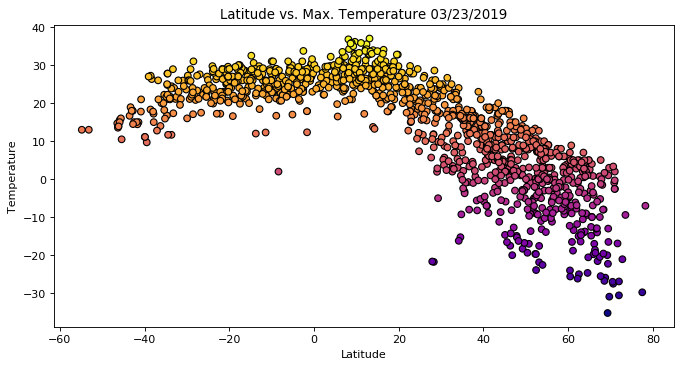

In [32]:
fig, ax = plt.subplots(num=1, figsize=(10,5), dpi=80, facecolor='w', edgecolor='k')
l1=ax.scatter(wd.Lat,wd.Max_Temp, c=wd.Max_Temp,
            edgecolor="black", linewidths=1, marker="o",
            cmap='plasma', alpha=1.0, label="City")
ax.set_xlabel('Latitude')
ax.set_ylabel('Temperature')
plt.title(f"Latitude vs. Max. Temperature {datetime.now().strftime('%m/%d/%Y')}")
plt.savefig("../Images/Latitude_Temperature_Plot.png")

#### Latitude vs. Humidity Plot

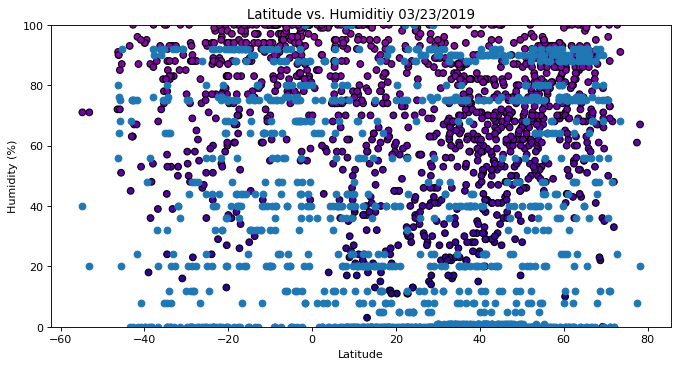

In [31]:
fig, ax = plt.subplots(num=2, figsize=(10,5), dpi=80, facecolor='w', edgecolor='k')
l1=ax.scatter(wd.Lat,wd.Humidity, c=wd.Humidity,
            edgecolor="black", linewidths=1, marker="o",
            cmap='plasma', alpha=1.0, label="City")
ax.set_xlabel('Latitude')
ax.set_ylabel('Humidity (%)')
ax.set_ylim([0,100])
plt.title(f"Latitude vs. Humiditiy {datetime.now().strftime('%m/%d/%Y')}")
l2=ax.scatter(wd.Lat,wd.Cloudiness)
plt.savefig("../Images/Latitude_Humidity_Plot.png")

#### Latitude vs. Cloudiness Plot

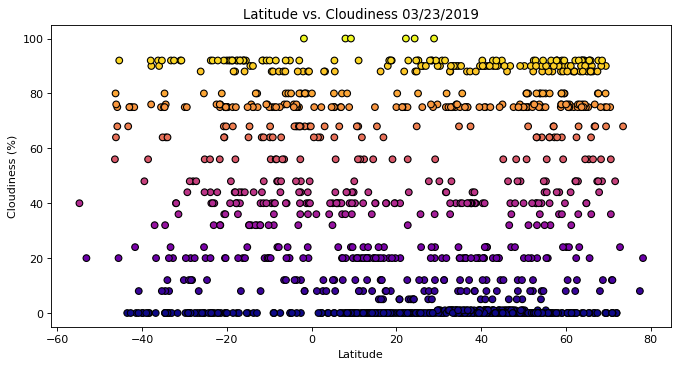

In [30]:
fig, ax = plt.subplots(num=3, figsize=(10,5), dpi=80, facecolor='w', edgecolor='k')
l1=ax.scatter(wd.Lat,wd.Cloudiness, c=wd.Cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            cmap='plasma', alpha=1.0, label="City")
ax.set_xlabel('Latitude')
ax.set_ylabel('Cloudiness (%)')
plt.title(f"Latitude vs. Cloudiness {datetime.now().strftime('%m/%d/%Y')}")
plt.savefig("../Images/Latitude_Cloudiness_Plot.png")

#### Latitude vs. Wind Speed Plot

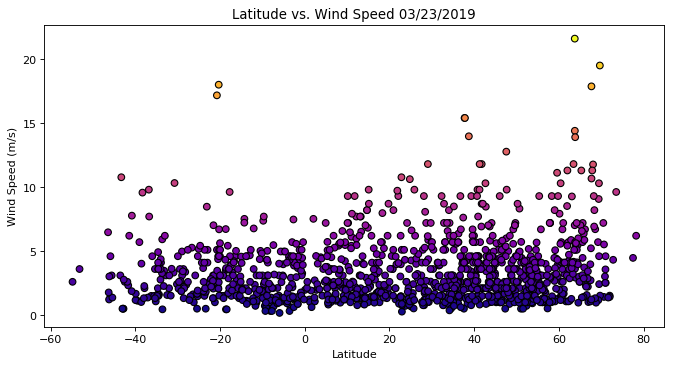

In [29]:
fig, ax = plt.subplots(num=4, figsize=(10,5), dpi=80, facecolor='w', edgecolor='k')
l1=ax.scatter(wd.Lat,wd.Wind_Speed, c=wd.Wind_Speed,
            edgecolor="black", linewidths=1, marker="o",
            cmap='plasma', alpha=1.0, label="City")
ax.set_xlabel('Latitude')
ax.set_ylabel('Wind Speed (m/s)')
plt.title(f"Latitude vs. Wind Speed {datetime.now().strftime('%m/%d/%Y')}")
plt.savefig("../Images/Latitude_WindSpeed_Plot.png")

## HeatMap of Maximum Temperature

In [17]:
# Configure gmaps with API key
import gmaps
gmaps.configure(api_key=gkey)

In [18]:
#max_temp = wd["Max_Temp"].astype(float)
a=np.reshape(np.array(wd["Max_Temp"]),(-1,1))
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
#np.array(wd["Max_Temp"].astype(float)).reshape(-1, 1)

b=[item for sublist in a for item in sublist]#takes 1*1*n array and return 1*n array, e.g. [[1],[2],[3]] to [1,2,3]
c=np.array(b).reshape(-1,1)
max_temp_sc=scaler.fit_transform(c)
d=[item for sublist in max_temp_sc for item in sublist]#takes 1*1*n array and return 1*n array, e.g. [[1],[2],[3]] to [1,2,3]

In [25]:
# Store 'Lat' and 'Lng' into  locations 
locations = wd[["Lat", "Lng"]].astype(float)

# Create a temperature Heatmap layer
fig = gmaps.figure(center=(14.09,-76.91),zoom_level=2)

heat_layer = gmaps.heatmap_layer(locations, weights=d, 
                                 dissipating=False, max_intensity=100,
                                 point_radius = 5)

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))